## K-means 評估

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans


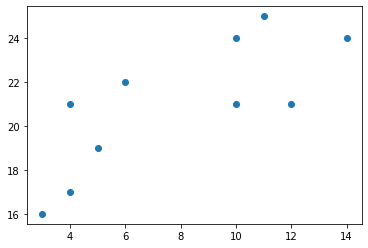

In [2]:
import matplotlib.pyplot as plt

x = [4, 5, 10, 4, 3, 11, 14 , 6, 10, 12]
y = [21, 19, 24, 17, 16, 25, 24, 22, 21, 21]

plt.scatter(x, y)
plt.show()

#### 檢視 每一種 分類 的 分類結果!

In [3]:
# 檢視 每一種 分類 的 分類結果!
#
data = list(zip(x, y))
ans = []

#分類個數 1..10
for i in range(1,11):
    km = KMeans(n_clusters=i)
    km.fit(data)
    ans.append(km.labels_)

# 一行 解
# ans = [KMeans(n_clusters=i).fit(data).labels_ for i in range(1, 11)]

ans


[array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0]),
 array([0, 0, 1, 0, 0, 1, 1, 0, 1, 1]),
 array([2, 2, 0, 1, 1, 0, 0, 2, 0, 0]),
 array([0, 0, 3, 2, 2, 3, 3, 0, 1, 1]),
 array([1, 1, 0, 4, 4, 0, 3, 1, 2, 2]),
 array([0, 4, 3, 2, 2, 3, 5, 0, 1, 1]),
 array([6, 0, 1, 3, 3, 1, 4, 5, 2, 2]),
 array([2, 6, 1, 0, 0, 1, 4, 5, 3, 7]),
 array([2, 7, 1, 0, 0, 8, 4, 5, 6, 3]),
 array([2, 6, 1, 9, 0, 8, 4, 5, 3, 7])]

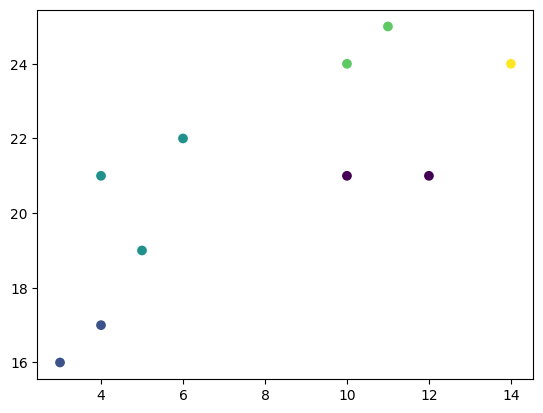

In [25]:
km = KMeans(n_clusters=5)
km.fit(data)

plt.scatter(x, y, c=km.labels_)
plt.show()

In [ ]:
km.cluster_centers_

In [6]:
[KMeans(n_clusters=i).fit(data).inertia_ for i in range(1, 11)]

[218.9,
 56.4,
 32.86666666666667,
 20.5,
 10.666666666666668,
 6.5,
 4.0,
 2.0,
 1.0,
 0.0]

#### km.inertia_ 的資料，展現出 Elbow 的 圖形資料。    
可以用 斜率 的 Max 值，來自動找出 Elbow。

In [19]:
kmeans_list = [KMeans(n_clusters=k).fit(data)
                for k in range(1, 11)]
inertias = [model.inertia_ for model in kmeans_list]
inertias

[218.9,
 56.4,
 32.86666666666667,
 19.0,
 10.666666666666668,
 6.5,
 4.0,
 2.0,
 1.0,
 0.0]

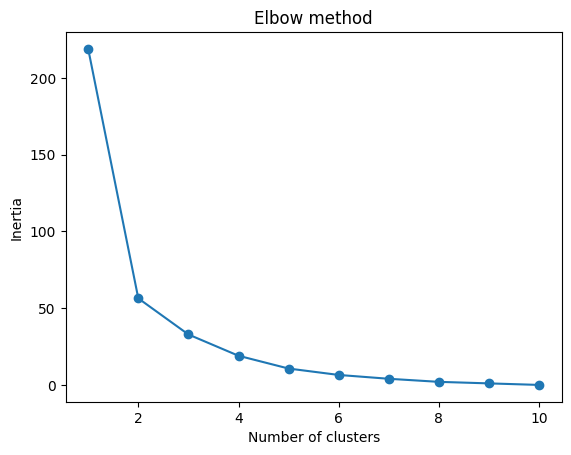

In [20]:
plt.plot(range(1,11), inertias, marker='o')
plt.title('Elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

### silhouette_score(data, km.labels_[i])     
原始 data , ith km model 的 labels

In [26]:
from sklearn.metrics import silhouette_score
ans = [KMeans(n_clusters=k).fit(data).labels_ for k in range(1, 11)]
ans

[array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0]),
 array([1, 1, 0, 1, 1, 0, 0, 1, 0, 0]),
 array([0, 0, 1, 2, 2, 1, 1, 0, 1, 1]),
 array([1, 1, 0, 2, 2, 0, 0, 1, 3, 3]),
 array([2, 2, 3, 0, 0, 3, 4, 2, 1, 1]),
 array([0, 0, 1, 3, 3, 1, 5, 4, 2, 2]),
 array([6, 5, 0, 1, 1, 0, 4, 2, 3, 3]),
 array([5, 1, 2, 4, 4, 2, 3, 6, 0, 7]),
 array([3, 5, 0, 1, 8, 0, 4, 6, 2, 7]),
 array([0, 6, 9, 2, 8, 1, 4, 5, 3, 7])]

In [27]:
kmeans_list = [KMeans(n_clusters=k).fit(data)
                for k in range(1, 10)]
kmeans_list

[KMeans(n_clusters=1),
 KMeans(n_clusters=2),
 KMeans(n_clusters=3),
 KMeans(n_clusters=4),
 KMeans(n_clusters=5),
 KMeans(n_clusters=6),
 KMeans(n_clusters=7),
 KMeans(),
 KMeans(n_clusters=9)]

In [ ]:
kmeans_list[1:]

In [30]:
# 只分一類 的 K Means model，不能拿來 計算 分數。
tkm = kmeans_list[2]
tkm.labels_

array([0, 0, 1, 2, 2, 1, 1, 0, 1, 1])

In [32]:
from sklearn.metrics import silhouette_score
silhouette_scores = [silhouette_score(data, k.labels_) for k in kmeans_list[1:]] # 1.. 9
# Number of labels is n_sample. so, Valid values are 2 to n_samples - 1 (inclusive)
# 10 個 cluster，編號為 0..9。 計算 silhouette 不含 n_clusters=1 (kmeans_list[0] 要排除。)
#  
silhouette_scores

[0.5639004266405117,
 0.49918509411565803,
 0.4183889396040515,
 0.442343977315765,
 0.3464284313379783,
 0.29836561799191885,
 0.2056694081398966,
 0.10813818837090103]

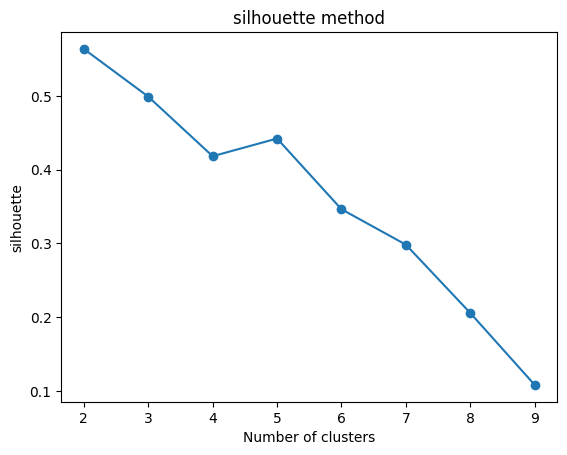

In [33]:
plt.plot(range(2,10), silhouette_scores, marker='o')
plt.title('silhouette method')
plt.xlabel('Number of clusters')
plt.ylabel('silhouette')
plt.show()

#### 測試用

In [ ]:
# 計算 單一個 K Means model 的 silhouette score。
#
ans = silhouette_score(data, kmeans_list[1].labels_)  # y 參數必須是 一維 np.array
# type(kmeans_list[1].labels_)   # numpy.ndarray
ans


In [ ]:
le = [KMeans(n_clusters = c ).fit(data).labels_ for c in range(1, 10)] # c 是 cluseters 個數！
#  c 指的是 n_clusters，因為 data 只有 10 筆資料，最多分成 10 clusters (1..10)
#                                       所 產生的 le[] 的編號為 0,1,2,...,9
# silhouette_score(data, le[1])
le

In [ ]:
# conclusion:
# 用 km 所產生的 labels_ 就能計算 每一類的 score !
#
s=[silhouette_score(data, le[i]) for i in range(1,9)]  # i 是 le[] array 的 編號。
s

#### 檢視 每一種 分類 的 分類 重心(Inertia) !

In [6]:
# km.inertia_
#
data = list(zip(x, y))
inertias = []

for i in range(1,11):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(data)
    inertias.append(kmeans.inertia_)

print(inertias)


[218.9, 56.4, 32.86666666666667, 19.0, 10.666666666666668, 6.5, 4.0, 2.0, 1.0, 0.0]


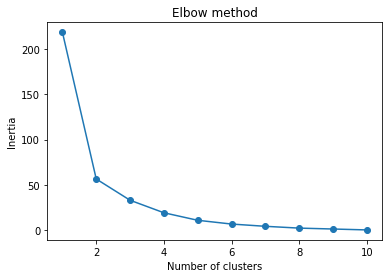

In [7]:
plt.plot(range(1,11), inertias, marker='o')
plt.title('Elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

由 Elbow 圖上看起來，K=2 是最佳分類??   
應該是 斜率 最大那一點!!! 可以計算一下!!

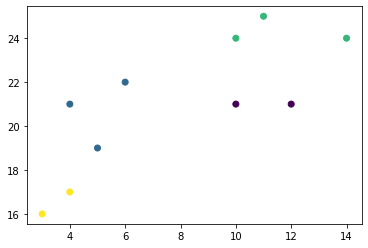

In [10]:
kmeans = KMeans(n_clusters=4)  # n_clusters=3, 4 都不差，也可以接受!!
kmeans.fit(data)

plt.scatter(x, y, c=kmeans.labels_)
plt.show()

### 評估效果 Calinski-Harabasz Index  
calinski_harabasz_score(df, km.labels_[i])  
原始 data , ith km model 的 labels_

In [28]:
# test...
from sklearn.metrics import calinski_harabasz_score
df = pd.DataFrame(data)
km_list=[]
# for n in range(2,10):
#     km = KMeans(n_clusters=n)
#     km.fit(data)
#     km_list.append(km)

km_list = [KMeans(n_clusters= i).fit(data) for i in range(1, 11)] #分類 cluster 1..10
# km_list

ans = [calinski_harabasz_score(data, km_list[i].labels_)  for i in range(1, 9)] # 只取 cluster 2..9
ans


[23.04964539007092,
 19.810851926977687,
 21.04210526315789,
 24.402343749999996,
 26.141538461538467,
 26.862499999999997,
 30.985714285714288,
 27.2375]

In [8]:
# 評估效果 Calinski-Harabasz Index
#
from sklearn.metrics import calinski_harabasz_score
df = pd.DataFrame(data)
for n in range(2, 10): 
  km = KMeans(n_clusters=n)
  km.fit(df)
  metric = calinski_harabasz_score(df, km.labels_) 
  print('群組數量：{}，評分：{}'.format(n, metric))

群組數量：2，評分：23.04964539007092
群組數量：3，評分：19.810851926977687
群組數量：4，評分：21.04210526315789
群組數量：5，評分：24.402343749999996
群組數量：6，評分：26.14153846153846
群組數量：7，評分：26.8625
群組數量：8，評分：30.98571428571429
群組數量：9，評分：27.2375


In [ ]:
silhouette_scores = [silhouette_score(data, k.labels_) for k in kmeans_list[1:]] # 1.. 9


#### reference  
https://www.w3schools.com/python/python_ml_k-means.asp  

算法周】光說不練都是假的！K-means實踐篇來啦~  
https://www.twblogs.net/a/5b7d3c832b71770a43de5d3a  

Calinski-Harabasz Index for K-Means Clustering Evaluation using Python  
https://pyshark.com/calinski-harabasz-index-for-k-means-clustering-evaluation-using-python/


